In [1]:
!pip install torch torchvision opencv-python matplotlib ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 44.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [18]:
# Import necessary libraries
import torch
from PIL import Image  # Ensure this import is correct
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import os

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-25 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Enter '1' to process an image or '2' to process a video: 1
Upload an image file...


Saving elephant-zebra-and-giraffe-in-etosha-national-park-namibia-the-elephant-KWHMY4.jpg to elephant-zebra-and-giraffe-in-etosha-national-park-namibia-the-elephant-KWHMY4.jpg
Attempting to load image...
Image loaded successfully: (1300, 1100)
Predictions:
           xmin        ymin         xmax        ymax  confidence  class  \
0    837.688843  399.424713  1090.942871  717.152039    0.902671     23   
1   1012.365295  700.684204  1212.558350  864.413635    0.892366     22   
2    354.818604  678.843994   588.140869  849.039795    0.891440     22   
3    819.341736  705.883667  1002.283386  880.263367    0.854979     22   
4    476.948517  334.798340   777.156921  720.893799    0.745287     23   
5    112.514114  645.824829   386.973267  835.954346    0.744453     22   
6    987.940125  694.752136  1112.572754  813.249146    0.713997     22   
7    255.839523  507.543365   462.338837  687.186462    0.685762     23   
8    813.370422  440.673340   902.151123  571.890137    0.610436    

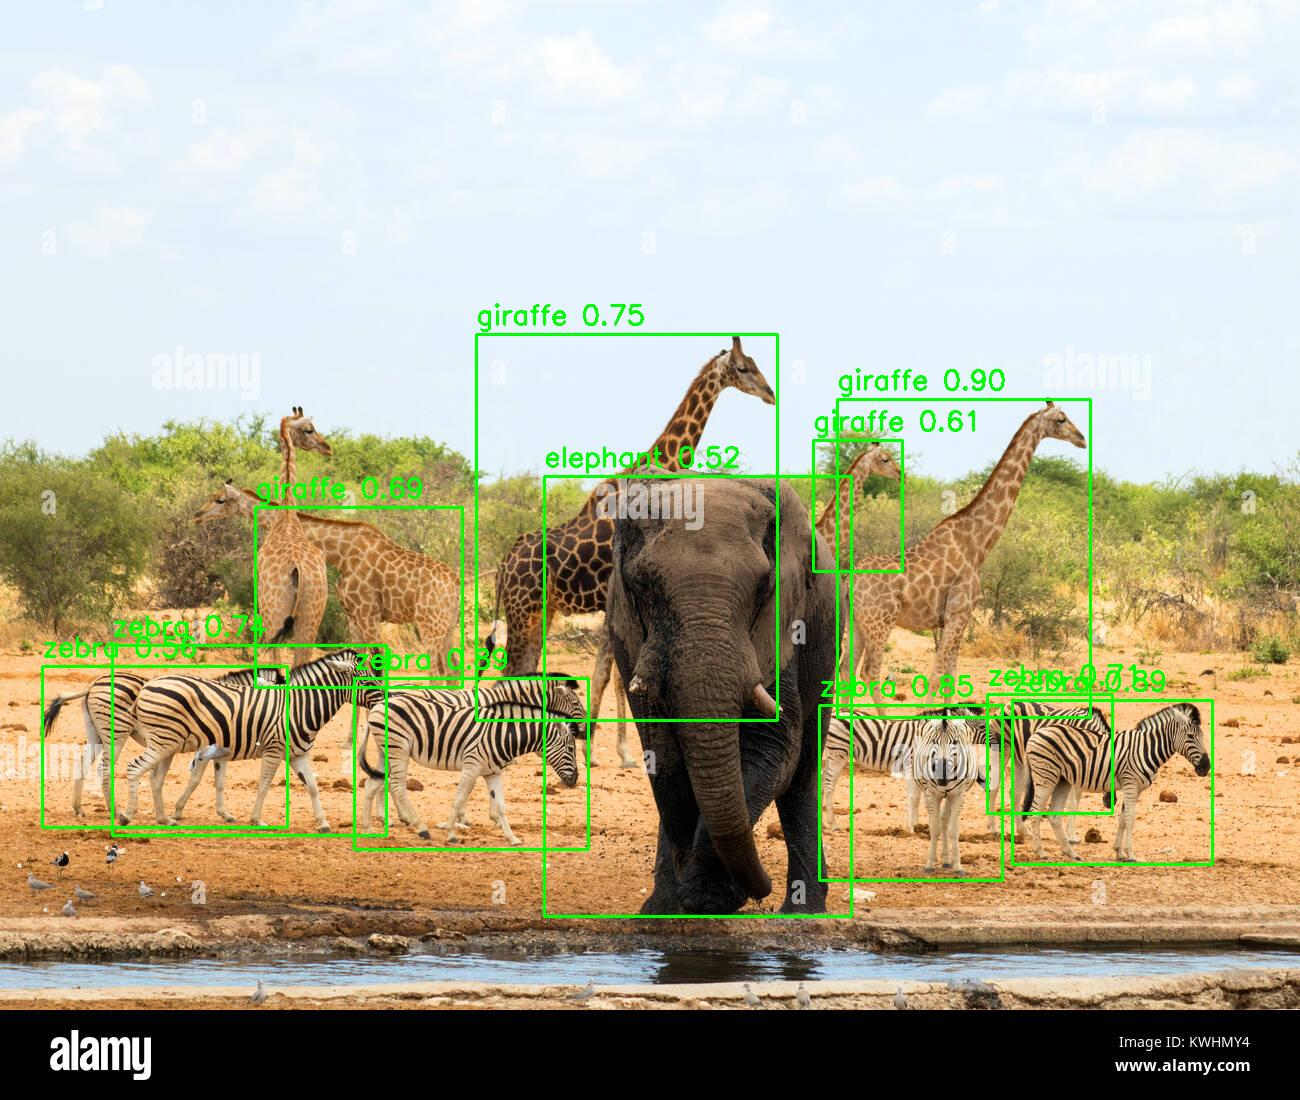

In [19]:
# Step 1: Load the pre-trained YOLOv5 model
def load_model():
    # Load the YOLOv5 model (pre-trained on COCO dataset)
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    return model

# Step 2: Perform object detection on an image
def detect_objects(image, model, threshold=0.5):
    # Perform inference
    results = model(image)  # Perform inference
    predictions = results.pandas().xyxy[0]  # Convert results to pandas DataFrame
    predictions = predictions[predictions['confidence'] >= threshold]  # Filter by confidence threshold

    # Debug predictions
    print("Predictions:")
    print(predictions)

    if predictions.empty:
        print("No objects detected.")
        return None

    # Draw bounding boxes and labels
    image_cv = np.array(image)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)

    for _, row in predictions.iterrows():
        x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} {row['confidence']:.2f}"
        cv2.rectangle(image_cv, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(image_cv, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert back to RGB for display
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
    return Image.fromarray(image_cv)

# Step 3: Process a single image
def process_image(image_path, model):
    # Load the image
    try:
        print("Attempting to load image...")
        image = Image.open(image_path).convert("RGB")  # Ensure this line works
        print(f"Image loaded successfully: {image.size}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Perform object detection
    detected_image = detect_objects(image, model)

    if detected_image is None:
        print("No objects detected or error occurred.")
        return

    # Save the processed image
    output_path = "output_image.jpg"
    detected_image.save(output_path)
    print(f"Processed image saved at {output_path}")

    # Display the image in Colab
    from IPython.display import Image as IPImage, display
    display(IPImage(output_path))

# Step 4: Process a video
def process_video(video_path, model, output_path="output_video.mp4", threshold=0.5):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video at {video_path}")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create a VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to PIL format
        frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Perform object detection
        results = model(frame_pil)  # Perform inference
        predictions = results.pandas().xyxy[0]  # Convert results to pandas DataFrame
        predictions = predictions[predictions['confidence'] >= threshold]  # Filter by confidence threshold

        # Draw bounding boxes and labels
        for _, row in predictions.iterrows():
            x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            label = f"{row['name']} {row['confidence']:.2f}"
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(frame, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Write the frame into the output file
        out.write(frame)

    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved at {output_path}")

# Step 5: Main function with file upload in Google Colab
def main():
    # Load the model
    model = load_model()

    # Choose between processing an image or a video
    choice = input("Enter '1' to process an image or '2' to process a video: ")

    if choice == '1':
        print("Upload an image file...")
        uploaded = files.upload()  # Upload file in Colab
        if not uploaded:
            print("No image file uploaded. Exiting...")
            return

        # Get the uploaded file path
        image_path = list(uploaded.keys())[0]
        process_image(image_path, model)
        os.remove(image_path)  # Clean up the uploaded file
    elif choice == '2':
        print("Upload a video file...")
        uploaded = files.upload()  # Upload file in Colab
        if not uploaded:
            print("No video file uploaded. Exiting...")
            return

        # Get the uploaded file path
        video_path = list(uploaded.keys())[0]
        process_video(video_path, model)
        os.remove(video_path)  # Clean up the uploaded file
    else:
        print("Invalid choice. Please enter '1' for image or '2' for video.")

if __name__ == "__main__":
    main()